In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm

### import tainter model

In [2]:
from tainter.model.simulation import tainter
import tainter.model.methods as tm
from tainter.f2_plot_stochastic import fig2_stochastic_simulations
from tainter.f3_plot_ensemble_with_approx import fig3_stochastic_ensemble_and_macroscopic_approximation

#### set model parameters

In [3]:
def calculate_initial_resource_access(N, mri_l):
    """
    scales the resource access of the network so that it ensures that the initial
    per capita energy production without coordinated workers equals 1.
    """
    return 1 / (N ** mri_l / N)


In [23]:
# general parameters
SEED = 651
plot_time = 5000
max_runtime = 10000

# simulation parameters (for all figures)
network="erdos"
network_size = 400
link_probability_between_nodes = 0.02
mri_of_laborers = 0.75
mri_of_coordinated_laborers = 0.75
efficiency_of_coordinated_laborers = 1.05
resource_access = calculate_initial_resource_access(
    N=network_size, mri_l=mri_of_laborers
)
shock_alpha = 1
shock_beta = 15
# should remain 1 because resource access is scaled for it
threshold_for_complexity_increase = 1  
first_admin = "highest degree"
choice_next_admin = "topcoordinated"

# figure 2 and 3
exploration_scenarios = [0, 0.00275,  0.02]  # must always be a list of 3

# figure 3
ensemble_data = "../data/ensemble/"
use_pre_simulated_data = False  # uses pre simulated data to generate plot
iterations = 100  # needs to be increased but will take some time


#### play with the simulation

Ecap: 1.0
# 0 Number of nodes: 400 mean degree: 7.88


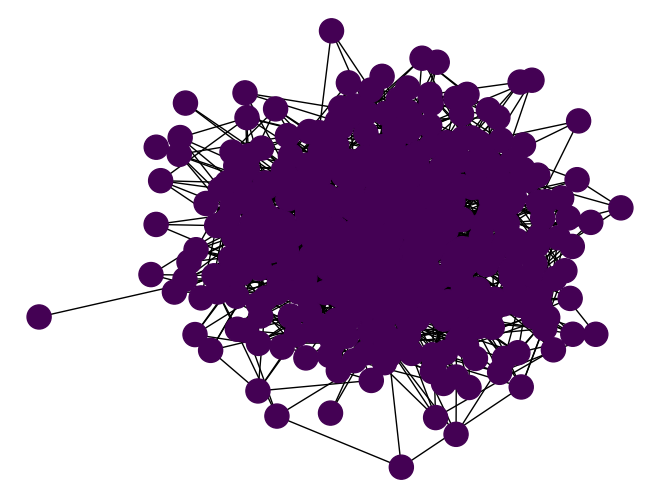

In [5]:
N_coordinated_workers = 10
t = 0
access = calculate_initial_resource_access(network_size, mri_of_laborers)
A, L, Lc, positions, E_cap, tmax, ainit, A_exp, L_exp, Lc_exp, Admin = tm.init(
    N=network_size, 
    a=access, 
    elast_l=mri_of_laborers, 
    elast_lc=mri_of_coordinated_laborers, 
    eff_lc=efficiency_of_coordinated_laborers,
    tmax=max_runtime
)
G = tm.construct_network(
    network=network, 
    N=network_size, 
    p=link_probability_between_nodes
)

ecap = tm.energy_out_capita(
    a=access, 
    L=L, 
    Lc=Lc, 
    elast_l=mri_of_laborers, 
    elast_lc=mri_of_coordinated_laborers, 
    eff_lc=efficiency_of_coordinated_laborers, 
    N=network_size
)


print(f"Ecap: {round(ecap,2)}")
tm.print_graph(t, A, Lc, L, G, positions, network_size)

#### response to shocks

time: 12, Ecap after network update: 0.8766816459018925
# 0 Number of nodes: 400 mean degree: 7.88


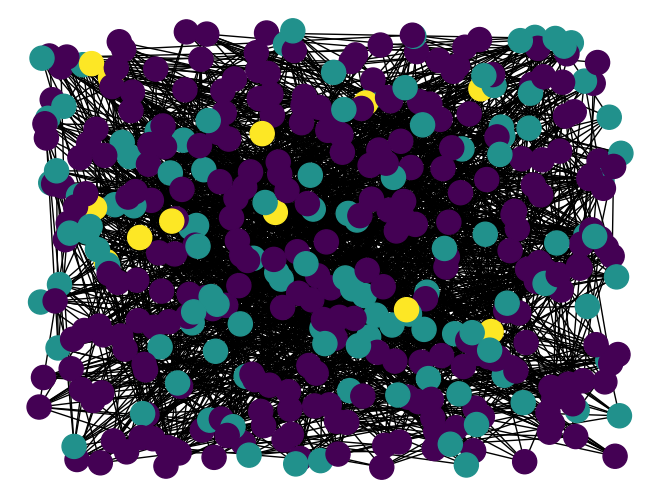

In [18]:
network_update = False
while not network_update:
    t += 1
    shock = tm.shock(shock_alpha, shock_beta)
    access_after_shock = resource_access * (1 - shock)

    # ecap after shock
    ecap = tm.energy_out_capita(
        access_after_shock, L, Lc, mri_of_laborers, mri_of_coordinated_laborers, 
        efficiency_of_coordinated_laborers, network_size)

    print(f"time: {t}, Ecap = {round(ecap, 2)} < {threshold_for_complexity_increase}", end="\r")
    if ecap < threshold_for_complexity_increase:
        Admin = tm.select_Admin(G, A, L, Lc, first_admin, choice_next_admin)

        # if no Admin is selected, there is no need to update the network
        if Admin != None:
            L, Lc, A = tm.update_network(A, L, Lc, Admin, G)

        ecap = tm.energy_out_capita(
            access_after_shock, L, Lc, mri_of_laborers, mri_of_coordinated_laborers, 
            efficiency_of_coordinated_laborers, network_size)

        print(f"time: {t}, Ecap after network update: {ecap}")

        tm.print_graph(0, A, Lc, L, G, positions, network_size, layout="fixed")

        network_update = True

executed scenario with exploration = 0
executed scenario with exploration = 0.00275
executed scenario with exploration = 0.02


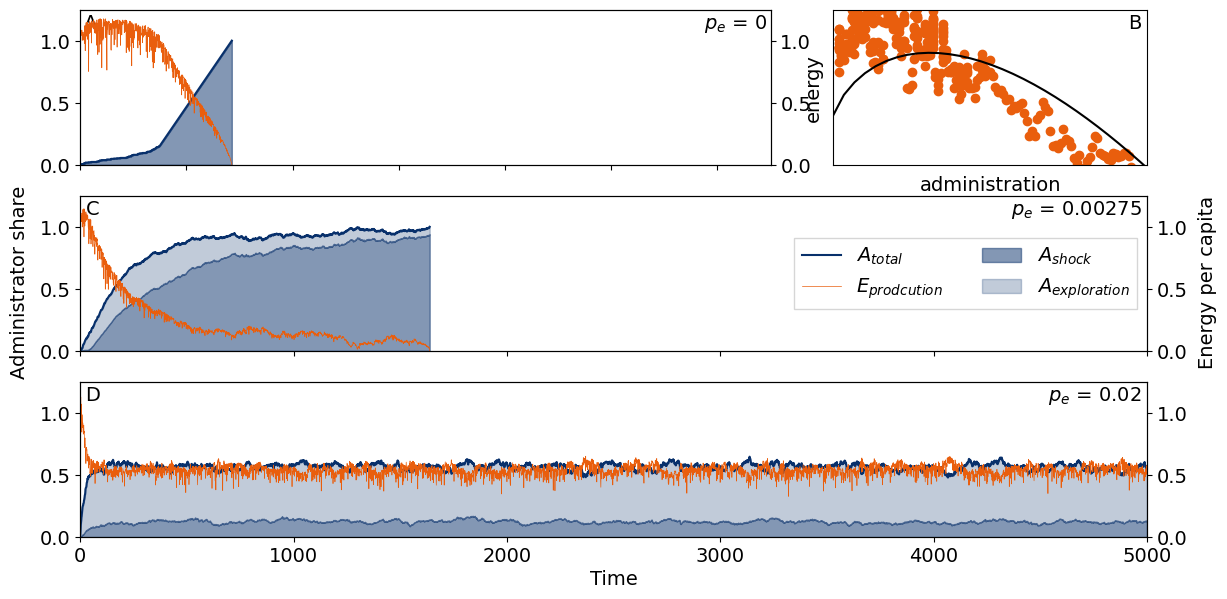

In [24]:
f2 = fig2_stochastic_simulations(
    seed=SEED,
    plot_time=plot_time,
    network_size=network_size,
    link_probability_between_nodes=link_probability_between_nodes,
    mri_of_laborers=mri_of_laborers,
    mri_of_coordinated_laborers=mri_of_coordinated_laborers,
    efficiency_of_coordinated_laborers=efficiency_of_coordinated_laborers,
    exploration_setups=exploration_scenarios,
    resource_access=resource_access,
    threshold_for_complexity_increase=threshold_for_complexity_increase,
    shock_alpha=shock_alpha,
    shock_beta=shock_beta
)
plt.show()
f2.savefig("pub_figure2.png", dpi = 65)


C:\Users\schunckf\Documents\Florian\packages\Tainter\tainter\f3_plot_ensemble_with_approx.py:40: UserWarning: 
you are about to overwrite pre-simulated data. If you continue,
all pre-simulated data will be deleted. Press ('y' to do so).
If you press 'n' (or 'enter'), the function will stop,
please restart with a new argument 'ensemble_data'.

  warnings.warn(textwrap.dedent("""
100%|██████████| 3/3 [00:29<00:00,  9.81s/it]
C:\Users\schunckf\Documents\Florian\packages\Tainter\tainter\f3_plot_ensemble_with_approx.py:163: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '', '', '', '', ''])


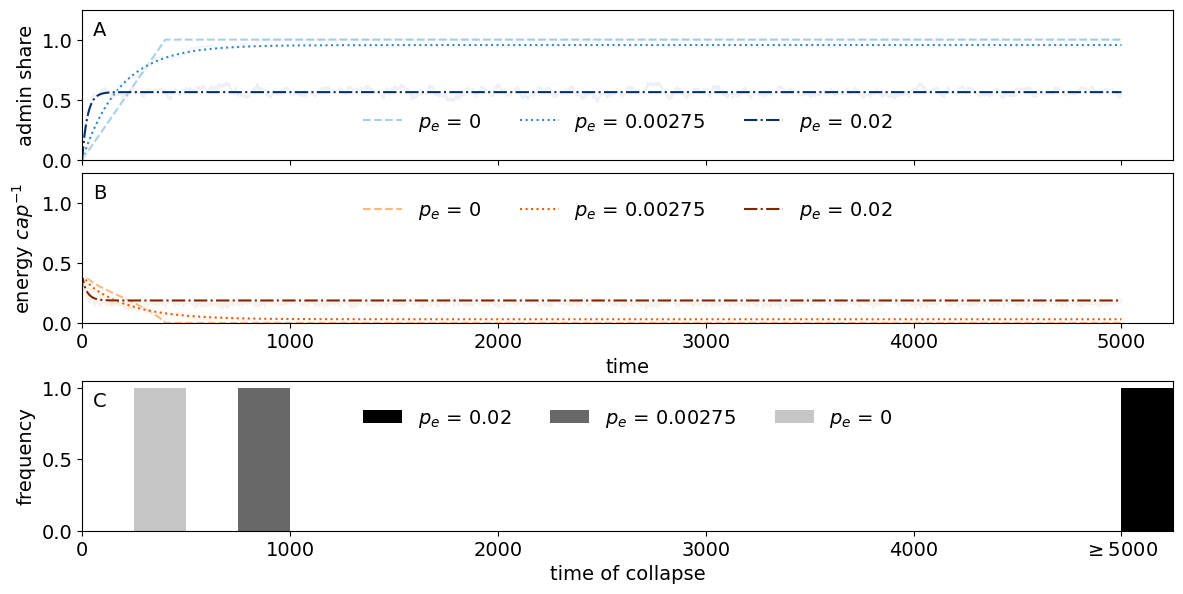

In [ ]:
f3 = fig3_stochastic_ensemble_and_macroscopic_approximation(
    seed=SEED,
    plot_time=plot_time,
    network_size=network_size,
    link_probability_between_nodes=link_probability_between_nodes,
    mri_of_laborers=mri_of_laborers,
    mri_of_coordinated_laborers=mri_of_coordinated_laborers,
    efficiency_of_coordinated_laborers=efficiency_of_coordinated_laborers,
    exploration_setups=exploration_scenarios,
    threshold_for_complexity_increase=threshold_for_complexity_increase,
    shock_alpha=shock_alpha,
    shock_beta=shock_beta,
    ensemble_data=ensemble_data,
    iterations=iterations,
    use_pre_simulated_data=use_pre_simulated_data
)
plt.show()
f3.savefig("pub_figure3.png", dpi = 65)